# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### Decision Tree

In [3]:
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE
)

In [4]:
param_distributions_dt = {
    'max_depth': [1, 2, 5, 10, 50, 100],
    'min_samples_split': [2, 3, 5, 7, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 3, 5, 7, 20, 50, 100] 
}

In [5]:
df_dt, model_dt, results_dt, _  = runner.new_search_params(
    model=dt,
    params=param_distributions_dt,
    X_train=X_train,
    Y_train=Y_train,
    model_name = 'decision_tree',
    max_combinations=100,
    load_model=False,
    save = True
)
util.show_results(results_dt)

Iniciando busca por hiperparâmetros...


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

Resultados do Modelo: decision_tree

Tempo da Busca de Parâmetros: 8.385s
Melhores Parâmetros Encontrados: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}

Tempo de Treinamento: 8.283s
Média de Memória Utilizada: -2.90 MB
Pico de Memória Utilizada: 0.18 MB


In [6]:
df_dt

,K,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.858033,1.0,0.861680,1.0,0.834761,1.0,0.835784,1.0,"[0.0, 0.11971830985915492, 1.0]","[0.0, 0.8357843137254902, 1.0]"
0,1,0.849167,1.0,0.853777,1.0,0.824362,1.0,0.821078,1.0,"[0.0, 0.1227452705675319, 1.0]","[0.0, 0.821078431372549, 1.0]"
4,5,0.847806,1.0,0.853227,1.0,0.822656,1.0,0.814838,1.0,"[0.0, 0.11922569291684998, 1.0]","[0.0, 0.8148375229920294, 1.0]"
2,3,0.847532,1.0,0.852203,1.0,0.822407,1.0,0.819129,1.0,"[0.0, 0.12406511218653761, 1.0]","[0.0, 0.8191293684855917, 1.0]"
3,4,0.839241,1.0,0.844262,1.0,0.812693,1.0,0.808706,1.0,"[0.0, 0.13022437307523096, 1.0]","[0.0, 0.8087063151440834, 1.0]"


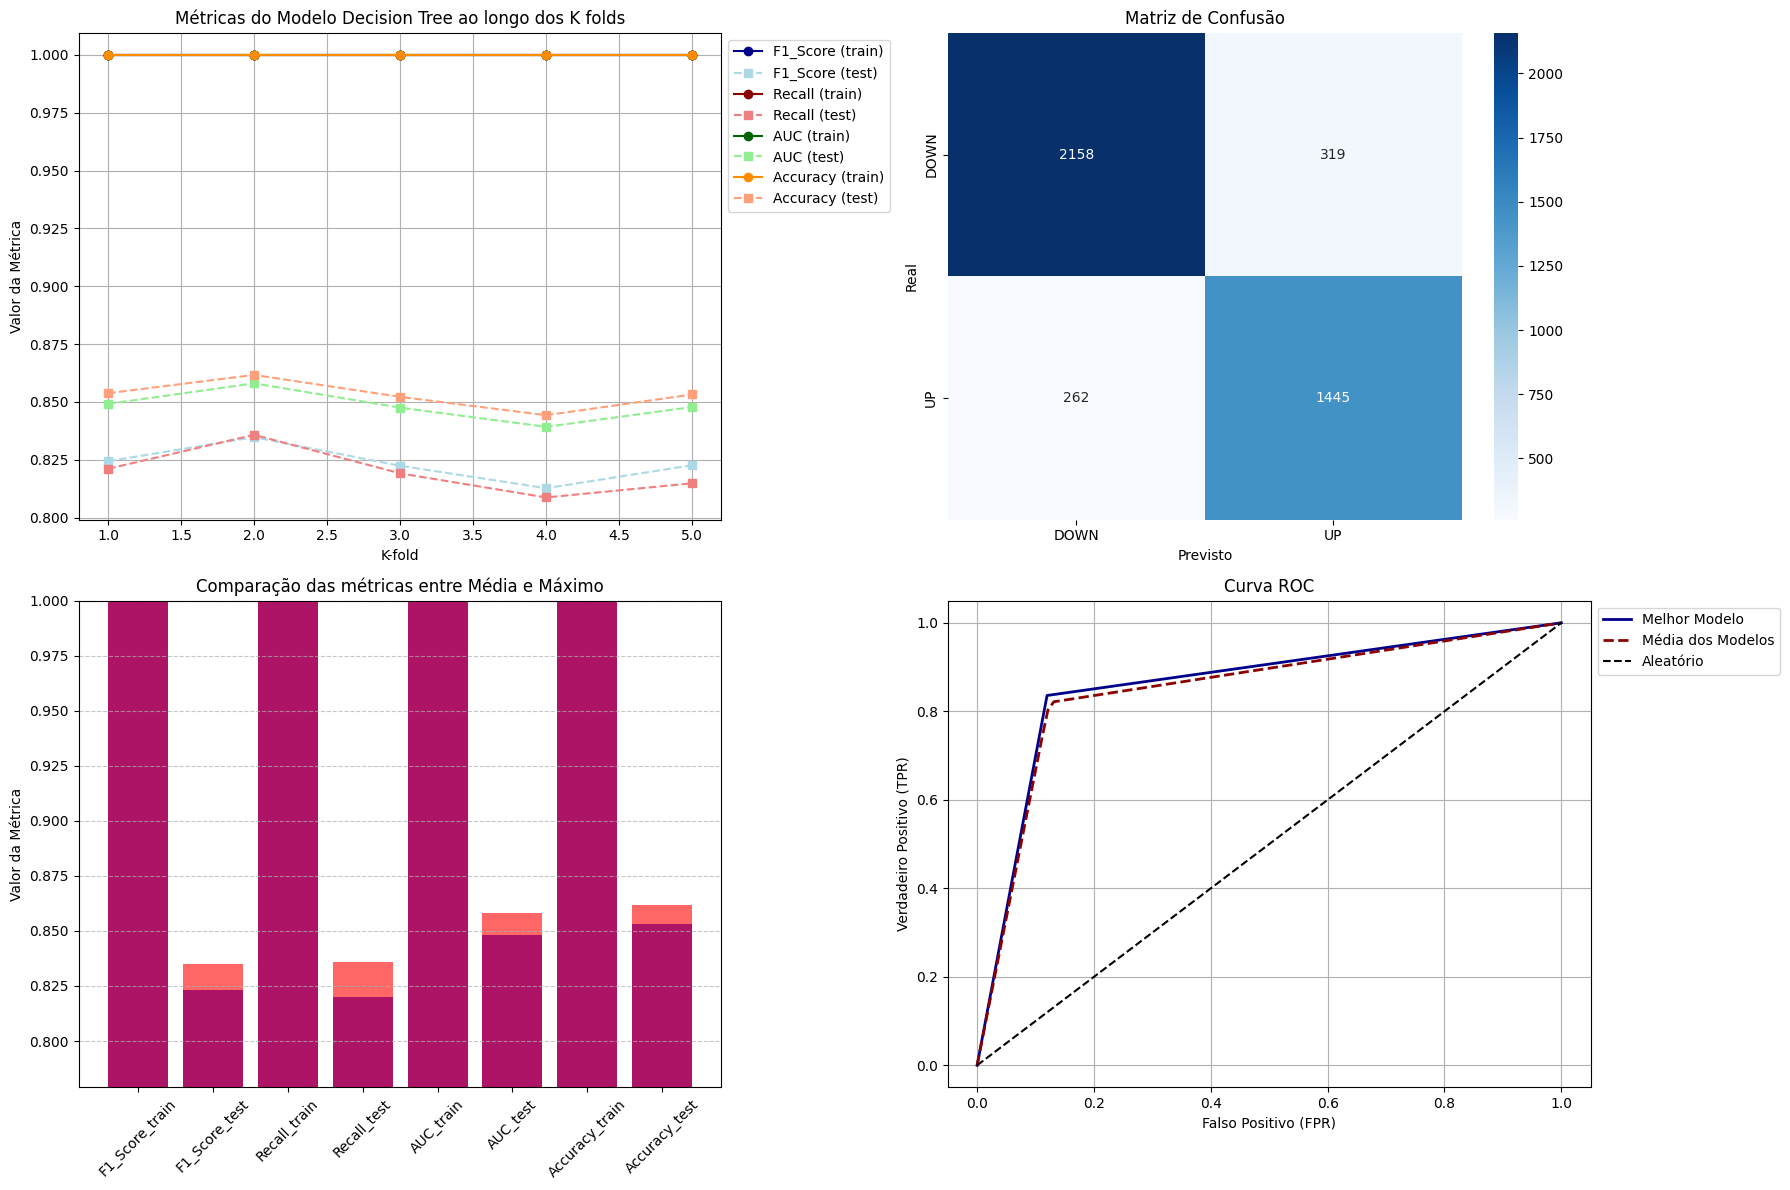

In [7]:
plots.model_evaluate(model_dt, df_dt, X_test, Y_test, model_name="Decision Tree")